## **Accessing the GPT-Wiki-Intro Dataset from Hugging Face**

### **Hugging Face Account Setup and Access Token Generation**

**Step 0: Create a Hugging Face Account and Access Token**

Before running the code, make sure you have a Hugging Face account and an access token. If you don't have an account, follow these steps:

1. **Sign up for a Hugging Face Account:**
   - Visit [Hugging Face](https://huggingface.co/join) and sign up for a free account if you don't have one.

2. **Generate an Access Token:**
   - After signing in, go to your account settings by clicking on your profile icon in the top-right corner and selecting "Settings".
   - Navigate to the "Access Tokens" section.
   - Click on "New Token" and generate a token with the appropriate permissions. Name it something memorable, like "MScProjectToken".
   - Copy this token securely as it will be required to access the dataset.

3. **Store the Token Securely in Your Environment:**

   - **In Google Colab**:
     - Use the Colab secret manager to store your token securely.
     - Click on the "🔑 (Secret)" icon in the sidebar, add a new secret with the key `HF_TOKEN`, and paste your access token as the value.

   - **In Jupyter Notebook or JupyterHub**:
     - You can set the token as an environment variable directly in your code:
       ```python
       import os
       os.environ['HF_TOKEN'] = 'your_hugging_face_access_token_here'
       ```

### **Access the Dataset in Your Code**

To access the dataset in your code, modify the dataset loading step to include the access token:

```python
from datasets import load_dataset
import os

# Ensure the token is set in your environment
hf_token = os.getenv('HF_TOKEN')  # or manually set it if not using an environment variable

# Load the dataset using the token
dataset = load_dataset("aadityaubhat/GPT-wiki-intro", use_auth_token=hf_token)["train"]
```

### **Example Integration in Your Code**

To ensure that your code is ready to access the dataset, add the following snippet at the beginning of each code file (before loading the dataset):

```python
# Step 0: Ensure Hugging Face Account and Token Setup
import os

# If not using Colab secret manager or environment variables, manually set the token here
# os.environ['HF_TOKEN'] = 'your_hugging_face_access_token_here'

# Load the dataset using the token stored in the environment variable
hf_token = os.getenv('HF_TOKEN')
if not hf_token:
    raise ValueError("Hugging Face access token not found. Please set the 'HF_TOKEN' environment variable.")

from datasets import load_dataset

# Load the dataset
dataset = load_dataset("aadityaubhat/GPT-wiki-intro", use_auth_token=hf_token)["train"]
```

### **Step 4: Run the Code**

After setting up the token and environment, you should be able to execute the code and models as intended. Ensure that the dataset is loaded correctly before proceeding with the rest of the code.

### **Step 5: Save the Token (Optional)**

If you prefer not to enter the token each time, you can save it in a secure file:

- **Google Colab**: Save the token securely in your Google Drive:
  ```python
  with open('/content/drive/MyDrive/hf_token.txt', 'w') as f:
      f.write(hf_token)
  ```

- **Jupyter Notebook/JupyterHub**: Save the token securely on your local system:
  ```python
  with open('hf_token.txt', 'w') as f:
      f.write(hf_token)
  ```

## **Model 1: Random Forest Classifier with TF-IDF Vectorization (Classical Machine Learning Approach)**

In [ ]:
# Step 1: Install Necessary Libraries
!pip install datasets scikit-learn pandas
!pip install seaborn matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
# Step 2: Import Required Libraries
import random
from datasets import load_dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, roc_auc_score
import numpy as np

In [ ]:
# Step 3: Load the Dataset from Hugging Face
print("Loading dataset...")
dataset = load_dataset("aadityaubhat/GPT-wiki-intro")["train"]
print("Dataset loaded.")
print(f"Total number of samples in the dataset: {len(dataset)}")

Loading dataset...


Generating train split:   0%|          | 0/150000 [00:00<?, ? examples/s]

Dataset loaded.
Total number of samples in the dataset: 150000


In [ ]:
# Step 4: Take 20% of the Dataset
print("Sampling 20% of the dataset...")
total_size = len(dataset)
sample_size = int(0.2 * total_size)
sampled_dataset = dataset.shuffle(seed=42).select(range(sample_size))
print(f"Sampled dataset size: {sample_size}")

Sampling 20% of the dataset...
Sampled dataset size: 30000


In [ ]:
# Step 5: Convert the Sampled Dataset to a DataFrame
print("Converting sampled dataset to DataFrame...")
df = sampled_dataset.to_pandas()
print("Sampled DataFrame created.")
print(df.head())

Converting sampled dataset to DataFrame...
Sampled DataFrame created.
         id                                                url  \
0  45675800  https://en.wikipedia.org/wiki/Gustave%20de%20R...   
1   2988186           https://en.wikipedia.org/wiki/Stay%20Fly   
2   5928500  https://en.wikipedia.org/wiki/Anglican%20ministry   
3  55676320    https://en.wikipedia.org/wiki/Mamdouh%20Hamadeh   
4  55897188        https://en.wikipedia.org/wiki/Steve%20Berke   

                   title                                         wiki_intro  \
0  Gustave de Rothschild  Gustave Samuel James de Rothschild, Baron de R...   
1               Stay Fly  "Stay Fly" is the first single from hip hop gr...   
2      Anglican ministry  The Anglican ministry is both the leadership a...   
3        Mamdouh Hamadeh  Mamdouh Hamadeh  is a Syrian journalist and ca...   
4            Steve Berke  Steve Ryan Berke (born 5 May 1981) is a co-fou...   

                                     generated_intro  titl

In [ ]:
# Step 6: Filter Human-Written and GPT-Generated Texts
print("Filtering human-written and GPT-generated texts...")
human_texts = df[df['wiki_intro'].notnull()]['wiki_intro']
machine_texts = df[df['generated_intro'].notnull()]['generated_intro']
print(f"Number of human-written texts: {len(human_texts)}")
print(f"Number of machine-generated texts: {len(machine_texts)}")

Filtering human-written and GPT-generated texts...
Number of human-written texts: 30000
Number of machine-generated texts: 30000


In [ ]:
# Step 7: Balance the Dataset
print("Balancing the dataset...")
min_size = min(len(human_texts), len(machine_texts))
random.seed(42)
balanced_human_texts = human_texts.sample(n=min_size, random_state=42).tolist()
balanced_machine_texts = machine_texts.sample(n=min_size, random_state=42).tolist()
texts = balanced_human_texts + balanced_machine_texts
labels = [0] * len(balanced_human_texts) + [1] * len(balanced_machine_texts)
print(f"Balanced dataset size: {len(texts)}")

Balancing the dataset...
Balanced dataset size: 60000


In [ ]:
# Step 8: Create a Balanced DataFrame
print("Creating a balanced DataFrame...")
balanced_df = pd.DataFrame({'text': texts, 'label': labels})
print("Balanced DataFrame created.")
print(balanced_df.head())

Creating a balanced DataFrame...
Balanced DataFrame created.
                                                text  label
0  Anam Cara is a phrase that refers to the Celti...      0
1  is a Japanese light novel series written by Ni...      0
2  The OA vz. 27 (Obrněný automobil vzor 27) was ...      0
3  The Last Hurrah is a 1956 novel written by Edw...      0
4  Sherman, Clay & Co. was an American musical in...      0


In [ ]:
# Step 9: Split the Data into Train, Validation, and Test Sets (70/15/15 split)
print("Splitting the data into train, validation, and test sets...")
X_train, X_temp, y_train, y_temp = train_test_split(balanced_df['text'], balanced_df['label'], test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}")
print(f"Test set size: {len(X_test)}")

Splitting the data into train, validation, and test sets...
Training set size: 42000
Validation set size: 9000
Test set size: 9000


In [ ]:
# Step 10: Initialize the TF-IDF Vectorizer
print("Initializing the TF-IDF Vectorizer...")
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
print("TF-IDF Vectorizer initialized.")

Initializing the TF-IDF Vectorizer...
TF-IDF Vectorizer initialized.


In [ ]:
# Step 11: Fit and Transform the Training Data
print("Fitting and transforming the training data with TF-IDF...")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF transformation complete.")
print(f"TF-IDF matrix shape (Training): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (Validation): {X_valid_tfidf.shape}")
print(f"TF-IDF matrix shape (Test): {X_test_tfidf.shape}")

Fitting and transforming the training data with TF-IDF...
TF-IDF transformation complete.
TF-IDF matrix shape (Training): (42000, 10000)
TF-IDF matrix shape (Validation): (9000, 10000)
TF-IDF matrix shape (Test): (9000, 10000)


In [ ]:
# Step 12: Initialize and Tune the Random Forest Classifier
print("Initializing and tuning the Random Forest Classifier...")
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Measure training time
print("Starting grid search...")
start_time = time.time()
grid_search.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Grid Search Training Time: {end_time - start_time:.2f} seconds")

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model
rf_classifier_best = grid_search.best_estimator_
print("Best Random Forest model obtained.")

Initializing and tuning the Random Forest Classifier...
Starting grid search...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Grid Search Training Time: 1549.28 seconds
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Random Forest model obtained.


In [ ]:
# Step 13: Train the Classifier with Best Parameters
print("Training the classifier with best parameters...")
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)

# Measure training time for the best model
start_time = time.time()
rf_classifier_best.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Training Time with Best Parameters: {end_time - start_time:.2f} seconds")

# Training accuracy
y_train_pred = rf_classifier_best.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Validation accuracy
y_valid_pred = rf_classifier_best.predict(X_valid_tfidf)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy * 100:.2f}%')

Training the classifier with best parameters...
Training Time with Best Parameters: 273.41 seconds
Training Accuracy: 100.00%
Validation Accuracy: 89.38%


In [ ]:
# Step 14: Evaluate on the Test Set
print("Evaluating the model on the test set...")
y_test_pred = rf_classifier_best.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Evaluating the model on the test set...
Test Accuracy: 90.26%


In [ ]:
# Step 15: Classification Report, Confusion Matrix, and ROC-AUC Score
print("Generating classification report, confusion matrix, and ROC-AUC score...")

report = classification_report(y_test, y_test_pred, target_names=['Human-written', 'Machine-generated'])
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

roc_auc = roc_auc_score(y_test, rf_classifier_best.predict_proba(X_test_tfidf)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

Generating classification report, confusion matrix, and ROC-AUC score...
Classification Report:
                    precision    recall  f1-score   support

    Human-written       0.88      0.93      0.90      4447
Machine-generated       0.93      0.87      0.90      4553

         accuracy                           0.90      9000
        macro avg       0.90      0.90      0.90      9000
     weighted avg       0.90      0.90      0.90      9000

Confusion Matrix:
 [[4145  302]
 [ 575 3978]]
ROC-AUC Score: 0.97


In [ ]:
# Step 16: Error Analysis
print("Performing error analysis...")
misclassified_indices = np.where(y_test_pred != y_test)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")
for i in misclassified_indices[:10]:  # Display the first 10 misclassified examples
    print(f"\nText: {X_test.iloc[i]}")
    print(f"Predicted: {'Machine-generated' if y_test_pred[i] == 1 else 'Human-written'}, Actual: {'Machine-generated' if y_test.iloc[i] == 1 else 'Human-written'}")

Performing error analysis...
Number of misclassified examples: 877

Text: Ronald Ulysses Swanson is a fictional character on the American television sitcom Parks and Recreation, played by Nick Offerman. He is the director of Pawnee's Department of Public Works and often expresses his disdain for government and bureaucracy. Swanson is often blunt, outspoken, and unapologetic.

Ron Swanson is a character who is unapologetic and blunt. He is the director of Pawnee's Department of Public Works, and he often expresses his disdain for government and bureaucracy. He is often straightforward in his opinions, and he does not care about social niceties or conventional wisdom. He is an independent thinker who does not conform to conventional wisdom or societal norms.
Predicted: Human-written, Actual: Machine-generated

Text: is a 1967 Japanese drama film directed by Kōji Wakamatsu. It was entered into the 6th Moscow International Film Festival.

The film tells the story of two brothers, one of wh

In [ ]:
# Step 17: Classify New Texts
def classify_text(text):
    input_tfidf = vectorizer.transform([text])
    prediction = rf_classifier_best.predict(input_tfidf)
    probs = rf_classifier_best.predict_proba(input_tfidf)
    label = prediction[0]
    confidence = probs[0][label] * 100
    return "Human-written" if label == 0 else "Machine-generated", confidence

# Example usage
input_text = input("Enter your text here: ")
classification, confidence = classify_text(input_text)
print(f"The text is classified as: {classification} with a confidence of {confidence:.2f}%")

Enter your text here: Fruits are a vital component of a healthy diet, offering a rich source of essential vitamins, minerals, and antioxidants. They come in a vast array of colors, flavors, and textures, providing both nourishment and delight to the senses. Each fruit carries its own unique set of benefits: oranges are packed with vitamin C, vital for immune support; bananas provide potassium, which is crucial for heart health; berries are rich in antioxidants, which help combat oxidative stress in the body.
The text is classified as: Machine-generated with a confidence of 86.71%


Generating Accuracy Bar Plot...


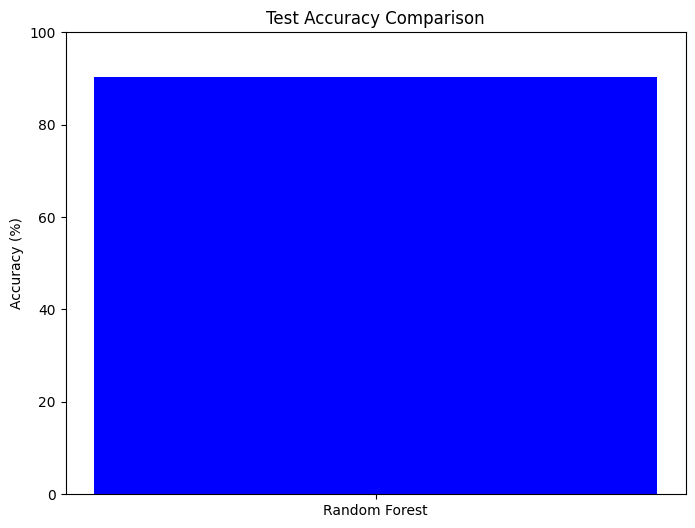

Generating Confusion Matrix Plot...


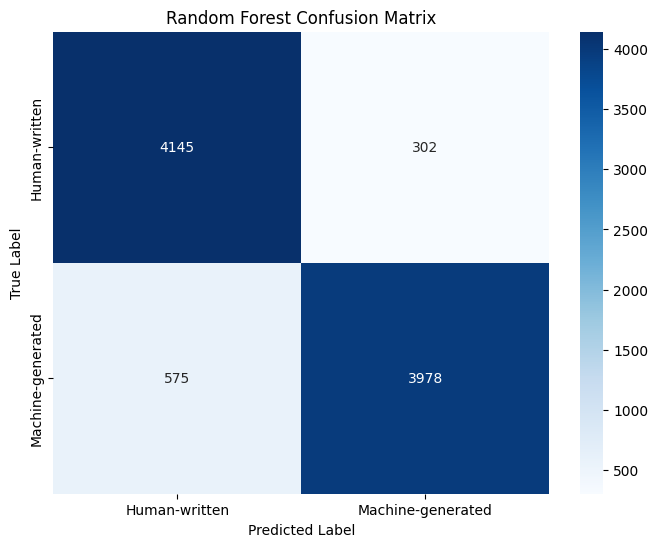

Generating ROC Curve...


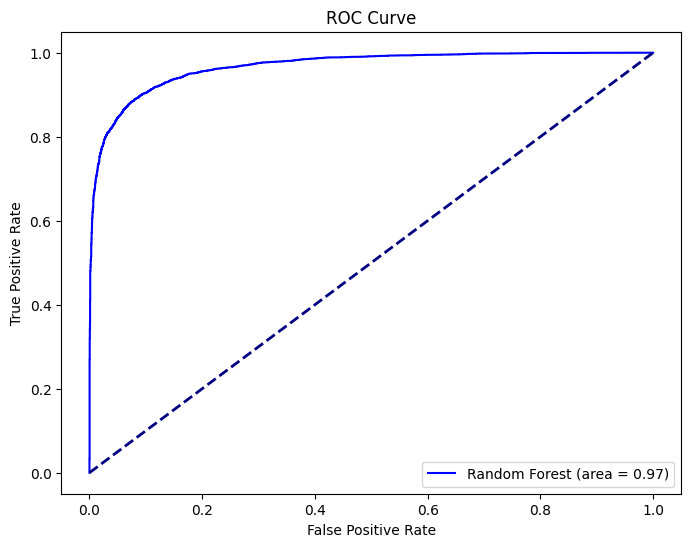

Generating Precision-Recall Curve...


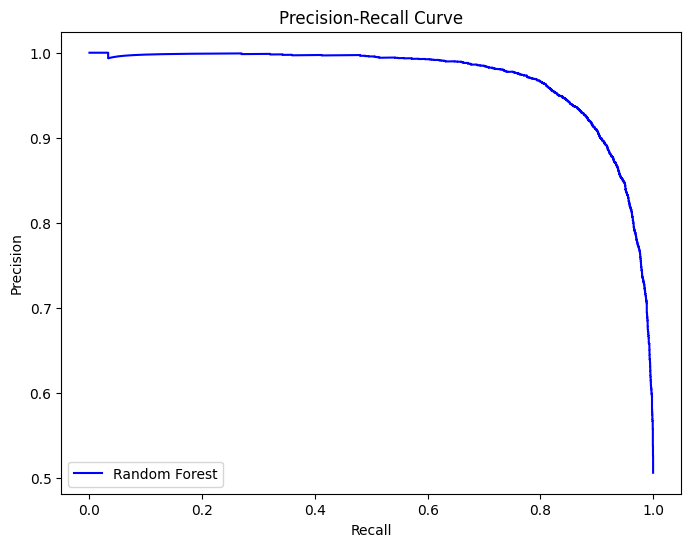

In [ ]:
# Step 18: Visualize Model Performance (Results and Plots)

# Accuracy Bar Plot
print("Generating Accuracy Bar Plot...")
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest'], [test_accuracy_rf * 100], color='blue')
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.savefig('rf_accuracy_bar_plot.png')
plt.show()

# Confusion Matrix
print("Generating Confusion Matrix Plot...")
conf_matrix_rf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human-written', 'Machine-generated'],
            yticklabels=['Human-written', 'Machine-generated'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('rf_confusion_matrix.png')
plt.show()

# ROC Curve
print("Generating ROC Curve...")
y_test_prob_rf = rf_classifier_best.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('rf_roc_curve.png')
plt.show()

# Precision-Recall Curve
print("Generating Precision-Recall Curve...")
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('rf_precision_recall_curve.png')
plt.show()

# **Model 2: LSTM Neural Network Classifier with GloVe Embeddings (Deep Learning Approach)**

In [ ]:
# Step 1: Install Necessary Libraries and Download GloVe Embeddings
!pip install torch torchvision torchaudio datasets nltk tensorflow
!pip install seaborn matplotlib scikit-learn
!wget http://nlp.stanford.edu/data/glove.6B.zip -P .
!unzip -o glove.6B.zip -d glove/

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
# Step 2: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, accuracy_score
import random
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time  # To time the training process
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 2: Libraries imported successfully.")

Step 2: Libraries imported successfully.


In [ ]:
# Step 3: Download NLTK Resources
nltk.download('wordnet')
nltk.download('omw-1.4')

print("Step 3: NLTK resources downloaded.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Step 3: NLTK resources downloaded.


In [ ]:
# Step 4: Define the Data Augmentation Functions
def get_synonyms(word):
    """Get synonyms for a given word using WordNet."""
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

def synonym_replacement(words, n):
    """Replace n random words in the sentence with their synonyms."""
    new_words = words.copy()
    random_word_list = list(set([word for word in words if get_synonyms(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break

    return new_words

def random_deletion(words, p):
    """Randomly delete words from the sentence with probability p."""
    if len(words) == 1:  # If the sentence contains only one word, return it
        return words

    new_words = []
    for word in words:
        if random.uniform(0, 1) > p:
            new_words.append(word)

    # If no words are added, return one random word
    if len(new_words) == 0:
        return [random.choice(words)]

    return new_words

def random_swap(words, n):
    """Randomly swap two words in the sentence n times."""
    new_words = words.copy()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(new_words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

def augment_text(text, n_synonym=1, p_deletion=0.1, n_swap=1):
    """Perform data augmentation on the input text."""
    words = text.split()
    if len(words) > 1:
        # Synonym replacement
        words = synonym_replacement(words, n_synonym)
        # Random deletion
        words = random_deletion(words, p_deletion)
        # Random swap
        words = random_swap(words, n_swap)
    return ' '.join(words)

print("Step 4: Data augmentation functions defined.")

Step 4: Data augmentation functions defined.


In [ ]:
# Step 5: Load the Dataset from Hugging Face and Create a Smaller Balanced Subset

# Load the dataset
dataset = load_dataset("aadityaubhat/GPT-wiki-intro")
print("Dataset loaded.")

# Determine the total size and calculate 20% of it
total_size = len(dataset['train'])
sample_size = int(0.2 * total_size)

# Shuffle and select 20% of the dataset
random.seed(42)
indices = random.sample(range(total_size), sample_size)

# Create a smaller subset of the dataset
small_dataset = dataset['train'].select(indices)
print(f"Created a smaller subset of the dataset with {sample_size} samples.")

# Separate human-written and machine-generated texts
human_texts = small_dataset.filter(lambda example: example['wiki_intro'] is not None)
machine_texts = small_dataset.filter(lambda example: example['generated_intro'] is not None)
print(f"Human texts: {len(human_texts)}, Machine-generated texts: {len(machine_texts)}")

# Ensure the dataset is balanced by selecting the same number of human and machine-generated texts
min_size = min(len(human_texts), len(machine_texts))

# Shuffle and select an equal number of examples from each category
human_indices = random.sample(range(len(human_texts)), min_size)
machine_indices = random.sample(range(len(machine_texts)), min_size)

# Create balanced subsets
balanced_human_texts = human_texts.select(human_indices)
balanced_machine_texts = machine_texts.select(machine_indices)

# Combine the texts and create corresponding labels
texts = balanced_machine_texts['generated_intro'] + balanced_human_texts['wiki_intro']
labels = [1] * len(balanced_machine_texts) + [0] * len(balanced_human_texts)
print(f"Balanced dataset created with {len(texts)} samples.")

Dataset loaded.
Created a smaller subset of the dataset with 30000 samples.


Filter:   0%|          | 0/30000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/30000 [00:00<?, ? examples/s]

Human texts: 30000, Machine-generated texts: 30000
Balanced dataset created with 60000 samples.


In [ ]:
# Step 6: Load GloVe Embeddings
glove_path = 'glove/glove.6B.100d.txt'

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

glove_embeddings = load_glove_embeddings(glove_path)
print("GloVe embeddings loaded.")

GloVe embeddings loaded.


In [ ]:
# Step 7: Tokenization, Padding, and Sequence Preparation
MAX_SEQ_LENGTH = 100
MAX_VOCAB_SIZE = 20000

# Initialize the tokenizer and fit it on the texts
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of indices
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to the same length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH)
print("Texts tokenized and padded.")

Texts tokenized and padded.


In [ ]:
# Step 8: Prepare GloVe Embedding Matrix
word_index = tokenizer.word_index
num_words = min(MAX_VOCAB_SIZE, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
    if i >= MAX_VOCAB_SIZE:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("GloVe embedding matrix prepared.")

GloVe embedding matrix prepared.


In [ ]:
# Step 9: Split the Dataset into Training, Validation, and Test Sets (70/15/15 split)
train_inputs, temp_inputs, train_labels, temp_labels = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
val_inputs, test_inputs, val_labels, test_labels = train_test_split(temp_inputs, temp_labels, test_size=0.5, random_state=42)

# Convert to TensorDatasets and create DataLoaders
train_data = TensorDataset(torch.tensor(train_inputs, dtype=torch.long), torch.tensor(train_labels, dtype=torch.long))
val_data = TensorDataset(torch.tensor(val_inputs, dtype=torch.long), torch.tensor(val_labels, dtype=torch.long))
test_data = TensorDataset(torch.tensor(test_inputs, dtype=torch.long), torch.tensor(test_labels, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print("Data split into training, validation, and test sets.")

Data split into training, validation, and test sets.


In [ ]:
# Step 10: Define the Enhanced Bidirectional LSTM Model with GloVe embeddings
class BidirectionalLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim1, hidden_dim2, output_size, dropout=0.2, embedding_matrix=None):
        super(BidirectionalLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Load the pre-trained GloVe embeddings
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
            self.embedding.weight.requires_grad = False

        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim1, num_layers=1, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_dim1 * 2, hidden_dim2, num_layers=1, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden_dim2 * 2, 128)  # 128-dimensional dense layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(128, output_size)  # Final dense layer with sigmoid activation

    def forward(self, x):
        x = self.embedding(x)  # Convert token indices to embeddings
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)
        out = self.fc1(lstm_out2[:, -1, :])
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return torch.sigmoid(out).squeeze()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BidirectionalLSTMClassifier(vocab_size=num_words, embedding_dim=100, hidden_dim1=128, hidden_dim2=64, output_size=1, dropout=0.2, embedding_matrix=embedding_matrix).to(device)

print("Bidirectional LSTM model defined.")

Bidirectional LSTM model defined.


In [ ]:
# Step 11: Train the Model
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Adaptive learning rate and early stopping
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
early_stopping_patience = 10
best_val_loss = float('inf')
early_stopping_counter = 0

# Initialize variables to track best model and time
training_start_time = time.time()

# Initialize lists to store metrics for plotting
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

print("Starting training...")

# Training Loop with dropout, adaptive learning rate, and early stopping
for epoch in range(10):  # Number of epochs
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    # Training
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        # Calculate training accuracy
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_losses.append(epoch_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())
            val_loss += loss.item()

            # Calculate validation accuracy
            predicted = (outputs > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / len(val_loader))
    scheduler.step(val_loss)

    print(f'Epoch {epoch+1}, Training Loss: {epoch_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_bidirectional_lstm_model.pth')
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

training_end_time = time.time()
training_time = training_end_time - training_start_time
print(f"Training completed in {training_time:.2f} seconds")

Starting training...
Epoch 1, Training Loss: 0.6014, Training Accuracy: 66.80%, Validation Loss: 91.4940, Validation Accuracy: 63.64%
Epoch 2, Training Loss: 0.4368, Training Accuracy: 79.20%, Validation Loss: 49.1308, Validation Accuracy: 84.52%
Epoch 3, Training Loss: 0.3100, Training Accuracy: 86.66%, Validation Loss: 41.8739, Validation Accuracy: 87.47%
Epoch 4, Training Loss: 0.2580, Training Accuracy: 89.20%, Validation Loss: 35.5824, Validation Accuracy: 89.36%
Epoch 5, Training Loss: 0.2223, Training Accuracy: 91.09%, Validation Loss: 33.5048, Validation Accuracy: 90.30%
Epoch 6, Training Loss: 0.1934, Training Accuracy: 92.22%, Validation Loss: 29.8962, Validation Accuracy: 91.30%
Epoch 7, Training Loss: 0.1644, Training Accuracy: 93.62%, Validation Loss: 31.4230, Validation Accuracy: 90.96%
Epoch 8, Training Loss: 0.1372, Training Accuracy: 94.80%, Validation Loss: 33.9605, Validation Accuracy: 90.48%
Epoch 9, Training Loss: 0.1124, Training Accuracy: 95.77%, Validation Loss:

In [ ]:
# Step 12: Evaluate the Model on the Test Set
model.load_state_dict(torch.load('best_bidirectional_lstm_model.pth'))  # Load the best model
model.eval()

test_correct = 0
test_total = 0
all_labels = []
all_predictions = []
all_probs = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probs.extend(outputs.cpu().numpy())

test_accuracy = 100 * test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 91.50%


In [ ]:
# Step 13: Generate a classification report, confusion matrix, and ROC-AUC score
report = classification_report(all_labels, all_predictions, target_names=["Human-written", "Machine-generated"])
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)

roc_auc = auc(roc_curve(all_labels, all_probs)[0], roc_curve(all_labels, all_probs)[1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
                    precision    recall  f1-score   support

    Human-written       0.93      0.90      0.91      4553
Machine-generated       0.90      0.93      0.92      4447

         accuracy                           0.92      9000
        macro avg       0.92      0.92      0.91      9000
     weighted avg       0.92      0.92      0.91      9000

Confusion Matrix:
 [[4111  442]
 [ 323 4124]]
ROC-AUC Score: 0.97


In [ ]:
# Step 14: Error Analysis
misclassified_indices = np.where(np.array(all_predictions) != np.array(all_labels))[0]
print(f"\nNumber of misclassified examples: {len(misclassified_indices)}")
for i in misclassified_indices[:10]:  # Display the first 10 misclassified examples
    print(f"\nText: {texts[i]}")
    print(f"Predicted: {'Machine-generated' if all_predictions[i] == 1 else 'Human-written'}, Actual: {'Machine-generated' if all_labels[i] == 1 else 'Human-written'}")


Number of misclassified examples: 765

Text: Valentine Winkler (March 18, 1864 – June 7, 1954) was an American composer and violinist.

Born in Cincinnati, Ohio, Winkler was the son of a German father and an American mother. He began his musical studies at the age of six, and at the age of thirteen he gave his first concert. He later studied with Carl Reinecke and Mathilde Marchesi in Vienna, and with Antonio Bazzini in Rome.

Winkler made his debut as a violin soloist with the Berlin Philharmonic in 1886. He subsequently toured Europe, North America, and Asia, performing under the baton of such noted conductors as Felix Mendelssohn, Johannes Brahms, and Leopold Stokowski. He also made numerous recordings.

Winkler was awarded the Pulitzer Prize for Music in 1932 for his composition "Song of the Lark". He retired from performing in 1945, but continued to compose until his death at the age of ninety-two.
Predicted: Machine-generated, Actual: Human-written

Text: Gregory Bruce Mann is a

In [ ]:
# Step 15: Classify New Texts
def classify_text(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    # Tokenize and vectorize the input text using the tokenizer
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQ_LENGTH)

    # Convert the input vector to a tensor and move it to the device
    input_tensor = torch.tensor(padded_sequence, dtype=torch.long).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        label = (output > 0.5).float().item()
        confidence = output.item() * 100

    return "Human-written" if label == 0 else "Machine-generated", confidence

# Example usage
input_text = input("Enter your text here: ")
classification, confidence = classify_text(input_text)
print(f"The text is classified as: {classification} with a confidence of {confidence:.2f}%")

Enter your text here: Fruits are a vital component of a healthy diet, offering a rich source of essential vitamins, minerals, and antioxidants. They come in a vast array of colors, flavors, and textures, providing both nourishment and delight to the senses. Each fruit carries its own unique set of benefits: oranges are packed with vitamin C, vital for immune support; bananas provide potassium, which is crucial for heart health; berries are rich in antioxidants, which help combat oxidative stress in the body.
The text is classified as: Machine-generated with a confidence of 100.00%


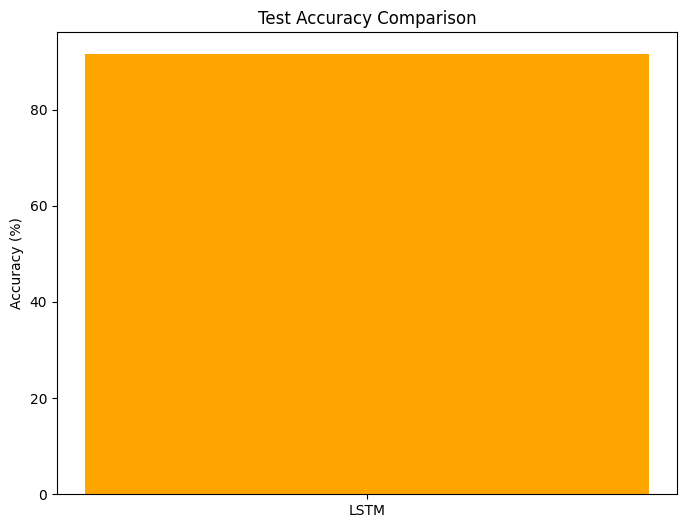

Test accuracy bar plot saved as 'lstm_accuracy_bar_plot.png'.


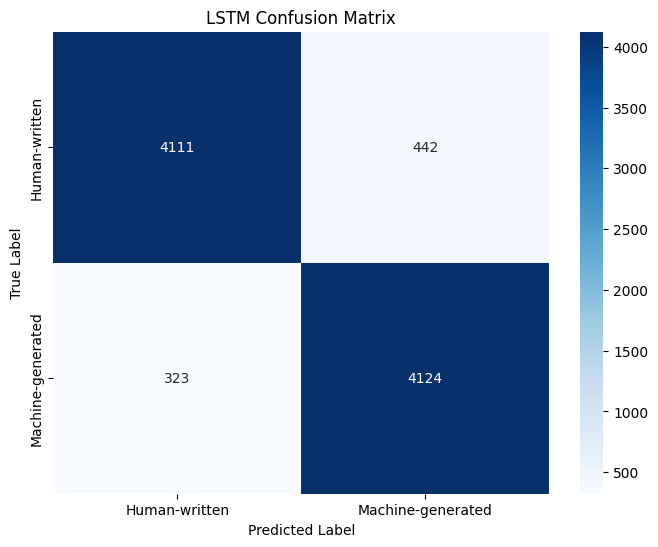

Confusion matrix heatmap saved as 'lstm_confusion_matrix.png'.


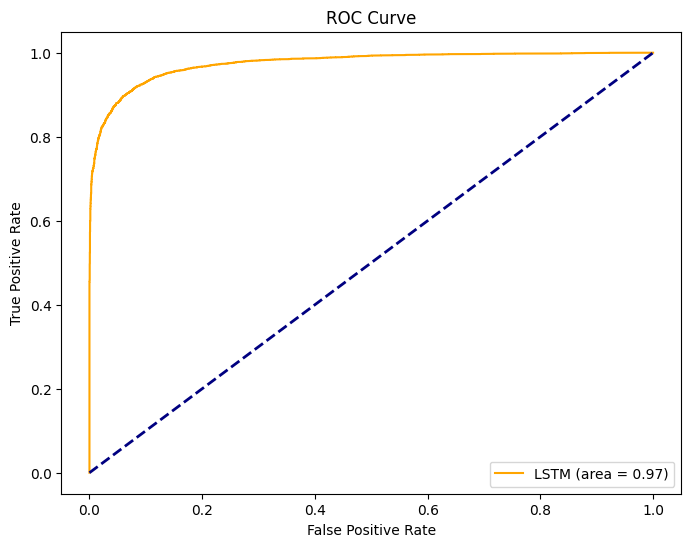

ROC curve saved as 'lstm_roc_curve.png'.


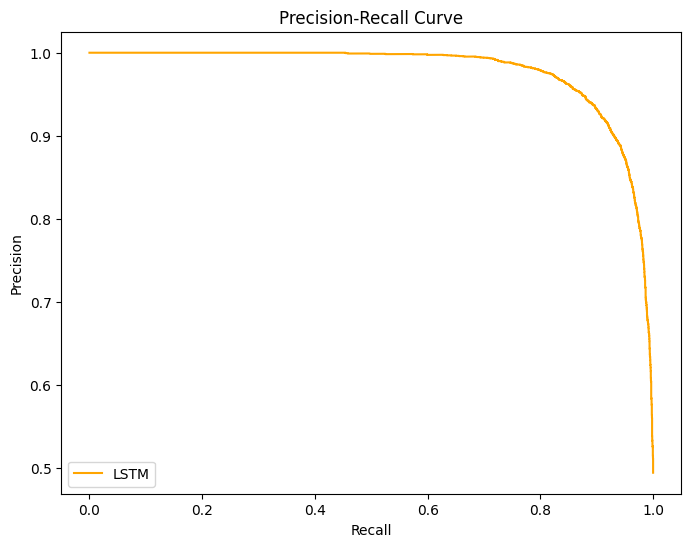

Precision-recall curve saved as 'lstm_precision_recall_curve.png'.


In [ ]:
# Step 16: Visualize Model Performance (Results and Plots)

# Accuracy Bar Plot
test_accuracy_lstm = accuracy_score(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
plt.bar(['LSTM'], [test_accuracy_lstm * 100], color='orange')
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.savefig('lstm_accuracy_bar_plot.png')
plt.show()
print("Test accuracy bar plot saved as 'lstm_accuracy_bar_plot.png'.")

# Confusion Matrix
conf_matrix_lstm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human-written', 'Machine-generated'], yticklabels=['Human-written', 'Machine-generated'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('lstm_confusion_matrix.png')
plt.show()
print("Confusion matrix heatmap saved as 'lstm_confusion_matrix.png'.")

# ROC Curve
fpr_lstm, tpr_lstm, _ = roc_curve(all_labels, all_probs)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (area = {roc_auc_lstm:.2f})', color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('lstm_roc_curve.png')
plt.show()
print("ROC curve saved as 'lstm_roc_curve.png'.")

# Precision-Recall Curve
precision_lstm, recall_lstm, _ = precision_recall_curve(all_labels, all_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall_lstm, precision_lstm, label='LSTM', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('lstm_precision_recall_curve.png')
plt.show()
print("Precision-recall curve saved as 'lstm_precision_recall_curve.png'.")

# **Model 3: BERT-Based Transformer Model (Deep Learning Approach)**

In [ ]:
# Step 1: Install Necessary Libraries
!pip install fsspec==2024.6.1 pyarrow==15.0.0
!pip install transformers datasets
!pip install accelerate
!pip install tf-keras
!pip install evaluate
!pip install nlpaug optuna
!pip install ray[tune]
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 15.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 35.5 MB/s eta 0:00:00


In [ ]:
# Step 2: Import Required Libraries
from datasets import load_dataset, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, AdamW, get_scheduler, EarlyStoppingCallback
import torch
import numpy as np
import evaluate
from transformers import DataCollatorWithPadding
import nlpaug.augmenter.word as naw
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc, precision_recall_curve
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 3: Load the Dataset from Hugging Face
print("Loading dataset...")
dataset = load_dataset("aadityaubhat/GPT-wiki-intro")["train"]
print(f"Original dataset size: {len(dataset)}")

Loading dataset...
Original dataset size: 150000


In [ ]:
# Step 4: Sample 20% of the dataset
sample_size = int(0.2 * len(dataset))
dataset = dataset.shuffle(seed=42).select(range(sample_size))
print(f"Sampled dataset size (20% of the original): {len(dataset)}")

Sampled dataset size (20% of the original): 30000


In [ ]:
# Step 5: Define the Data Augmentation Function
def augment_text(text):
    aug = naw.SynonymAug(aug_src='wordnet')
    return aug.augment(text)

In [ ]:
# Step 6: Balance the Dataset
def balance_dataset(dataset):
    print("Balancing dataset...")
    human_texts = dataset.filter(lambda example: example["wiki_intro"] is not None)["wiki_intro"]
    machine_texts = dataset.filter(lambda example: example["generated_intro"] is not None)["generated_intro"]

    min_size = min(len(human_texts), len(machine_texts))

    human_indices = random.sample(range(len(human_texts)), min_size)
    machine_indices = random.sample(range(len(machine_texts)), min_size)

    balanced_human_texts = [human_texts[i] for i in human_indices]
    balanced_machine_texts = [machine_texts[i] for i in machine_indices]

    print(f"Balanced human-written texts: {len(balanced_human_texts)}")
    print(f"Balanced machine-generated texts: {len(balanced_machine_texts)}")

    texts = balanced_human_texts + balanced_machine_texts
    labels = [0] * len(balanced_human_texts) + [1] * len(balanced_machine_texts)

    return texts, labels

balanced_texts, balanced_labels = balance_dataset(dataset)
balanced_texts = [str(text) for text in balanced_texts]
balanced_dataset = Dataset.from_dict({"text": balanced_texts, "label": balanced_labels})
print(f"Balanced dataset created with {len(balanced_dataset)} samples.")

Balancing dataset...


Filter:   0%|          | 0/30000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/30000 [00:00<?, ? examples/s]

Balanced human-written texts: 30000
Balanced machine-generated texts: 30000
Balanced dataset created with 60000 samples.


In [ ]:
# Step 7: Preprocess and Augment the Data
def preprocess_function(examples):
    print("Preprocessing and augmenting the data...")
    augmented_texts = [augment_text(text) for text in examples["text"][:int(0.2 * len(examples["text"]))]]
    augmented_labels = examples["label"][:len(augmented_texts)]

    texts = examples["text"] + augmented_texts
    labels = examples["label"] + augmented_labels

    return {"text": [str(text) for text in texts], "label": labels}

processed_dataset = balanced_dataset.map(preprocess_function, batched=True)
print(f"Processed dataset size: {len(processed_dataset)}")

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Preprocessing and augmenting the data...


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing and augmenting the data...
Preprocessing an

In [ ]:
# Step 8: Sample and Split the Dataset (70/15/15 split)
print("Splitting the dataset into train/validation/test sets...")
train_valid_dataset = processed_dataset.train_test_split(test_size=0.3, seed=42)
train_dataset = train_valid_dataset["train"]
temp_dataset = train_valid_dataset["test"]
validation_test_dataset = temp_dataset.train_test_split(test_size=0.5, seed=42)
validation_dataset = validation_test_dataset["train"]
test_dataset = validation_test_dataset["test"]

label_counts = np.bincount(train_dataset['label'])
print(f"Label distribution in the training dataset: {label_counts}")

Splitting the dataset into train/validation/test sets...
Label distribution in the training dataset: [25242 25158]


In [ ]:
# Step 9: Define Model Initialization Function
def model_init():
    print("Initializing BERT model...")
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    return model

In [ ]:
# Step 10: Tokenize the Data
print("Tokenizing the data...")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_validation_dataset = validation_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
print(f"Tokenization complete. Sample tokenized text: {tokenized_train_dataset[0]['text']}")

Tokenizing the data...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/50400 [00:00<?, ? examples/s]

Map:   0%|          | 0/10800 [00:00<?, ? examples/s]

Map:   0%|          | 0/10800 [00:00<?, ? examples/s]

Tokenization complete. Sample tokenized text: Omega Orionis (ω Ori) is a single-star system in the constellation of Orion. It is faintly visible to the naked eye with an apparent magnitude of 4.87. Based upon an annual parallax shift of 21.48 km, it is located about 560 light years from Earth. The system is moving closer to the Sun with a radial velocity of −20 km/s.

To the unaided eye, Omega Orionis appears as a single point of light, but using a telescope it can be seen to consist of two stars that are separated by about 5 arcseconds. The primary star is a yellow-white dwarf with a stellar classification of K1 III, while the secondary star is a much larger red dwarf with a classification of M2 V. Both stars are thought to be surrounded by a circumstellar disk of gas and dust.


In [ ]:
# Step 11: Prepare Data Collator and Metrics
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    acc = accuracy.compute(predictions=predictions, references=labels)
    return {
        'accuracy': acc['accuracy'],
        'roc_auc': roc_auc_score(labels, predictions)
    }

In [ ]:
# Step 12: Define Custom Trainer Class
class CustomTrainer(Trainer):
    def create_optimizer_and_scheduler(self, num_training_steps: int):
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.args.learning_rate, weight_decay=self.args.weight_decay)
        self.lr_scheduler = get_scheduler(
            self.args.lr_scheduler_type,
            optimizer=self.optimizer,
            num_warmup_steps=self.args.warmup_steps,
            num_training_steps=num_training_steps,
        )

In [ ]:
# Step 13: K-Fold Cross-Validation & Model Training
k_folds = 2
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
all_results = []

start_time = time.time()  # Start the timer

for fold, (train_idx, val_idx) in enumerate(kf.split(tokenized_train_dataset)):
    print(f'Fold {fold + 1}/{k_folds}')

    train_subset = tokenized_train_dataset.select(train_idx)
    val_subset = tokenized_train_dataset.select(val_idx)

    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold + 1}",
        eval_strategy="epoch",
        learning_rate=1e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=5,
        weight_decay=0.05,
        warmup_steps=500,
        save_strategy="epoch",
        load_best_model_at_end=True,
        lr_scheduler_type='cosine',
    )

    trainer = CustomTrainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_subset,
        eval_dataset=val_subset,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )

    print("Starting training...")
    trainer.train()
    eval_results = trainer.evaluate(eval_dataset=val_subset)
    train_results = trainer.evaluate(eval_dataset=train_subset)  # Evaluate on the training set for training accuracy
    print(f"Training set results for fold {fold + 1}: {train_results}")
    print(f"Validation set results for fold {fold + 1}: {eval_results}")
    all_results.append((train_results, eval_results))

end_time = time.time()  # End the timer
training_time = end_time - start_time
print(f"Total training time across all folds: {training_time:.2f} seconds")

Fold 1/2
Initializing BERT model...


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training...
Initializing BERT model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Roc Auc
1,0.056700,0.100407,0.975714,0.975901
2,0.022500,0.165304,0.965000,0.965281
3,0.007400,0.297710,0.952976,0.953357
4,0.000800,0.247605,0.964127,0.964419


Training set results for fold 1: {'eval_loss': 0.0688432976603508, 'eval_accuracy': 0.9832539682539683, 'eval_roc_auc': 0.9831738934268477, 'eval_runtime': 176.6505, 'eval_samples_per_second': 142.655, 'eval_steps_per_second': 8.916, 'epoch': 4.0}
Validation set results for fold 1: {'eval_loss': 0.10040732473134995, 'eval_accuracy': 0.9757142857142858, 'eval_roc_auc': 0.9759013060501779, 'eval_runtime': 176.9741, 'eval_samples_per_second': 142.394, 'eval_steps_per_second': 8.9, 'epoch': 4.0}
Fold 2/2
Initializing BERT model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training...
Initializing BERT model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Roc Auc
1,0.052600,0.278324,0.943373,0.943095
2,0.027000,0.286730,0.947976,0.947720
3,0.009100,0.137527,0.979405,0.979304
4,0.000600,0.262904,0.964722,0.964548
5,0.000000,0.239491,0.968452,0.968296


Training set results for fold 2: {'eval_loss': 0.0492643266916275, 'eval_accuracy': 0.9906746031746032, 'eval_roc_auc': 0.990750944584383, 'eval_runtime': 176.8769, 'eval_samples_per_second': 142.472, 'eval_steps_per_second': 8.904, 'epoch': 5.0}
Validation set results for fold 2: {'eval_loss': 0.13752682507038116, 'eval_accuracy': 0.9794047619047619, 'eval_roc_auc': 0.9793037001979312, 'eval_runtime': 176.7928, 'eval_samples_per_second': 142.54, 'eval_steps_per_second': 8.909, 'epoch': 5.0}
Total training time across all folds: 6916.45 seconds


In [ ]:
# Step 14: Calculate Average Results
print("Calculating average results across all folds...")
average_train_results = {}
average_val_results = {}
for key in all_results[0][0].keys():
    average_train_results[key] = np.mean([result[0][key] for result in all_results])
    average_val_results[key] = np.mean([result[1][key] for result in all_results])

print(f"Average training results across all {k_folds} folds: {average_train_results}")
print(f"Average validation results across all {k_folds} folds: {average_val_results}")

Calculating average results across all folds...
Average training results across all 2 folds: {'eval_loss': 0.05905381217598915, 'eval_accuracy': 0.9869642857142857, 'eval_roc_auc': 0.9869624190056153, 'eval_runtime': 176.7637, 'eval_samples_per_second': 142.5635, 'eval_steps_per_second': 8.91, 'epoch': 4.5}
Average validation results across all 2 folds: {'eval_loss': 0.11896707490086555, 'eval_accuracy': 0.9775595238095238, 'eval_roc_auc': 0.9776025031240545, 'eval_runtime': 176.88344999999998, 'eval_samples_per_second': 142.46699999999998, 'eval_steps_per_second': 8.9045, 'epoch': 4.5}


In [ ]:
# Step 15: Final Evaluation on the Test Set
print("Evaluating on the final test set...")
final_results = trainer.evaluate(eval_dataset=tokenized_test_dataset)
print(f"Final evaluation on the test set: {final_results}")

predictions = np.argmax(trainer.predict(tokenized_test_dataset).predictions, axis=1)
labels = tokenized_test_dataset['label']

report = classification_report(labels, predictions, target_names=["Human-written", "Machine-generated"])
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(labels, predictions)
print("Confusion Matrix:\n", conf_matrix)

roc_auc = roc_auc_score(labels, predictions)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Evaluating on the final test set...


Final evaluation on the test set: {'eval_loss': 0.1632971465587616, 'eval_accuracy': 0.9750925925925926, 'eval_roc_auc': 0.9748457078735739, 'eval_runtime': 75.7632, 'eval_samples_per_second': 142.549, 'eval_steps_per_second': 8.909, 'epoch': 5.0}
Classification Report:
                    precision    recall  f1-score   support

    Human-written       1.00      0.95      0.97      5347
Machine-generated       0.95      1.00      0.98      5453

         accuracy                           0.98     10800
        macro avg       0.98      0.97      0.98     10800
     weighted avg       0.98      0.98      0.98     10800

Confusion Matrix:
 [[5078  269]
 [   0 5453]]
ROC-AUC Score: 0.97


In [ ]:
# Step 16: Classify New Text
def classify_text(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    outputs = trainer.model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    label = torch.argmax(probs).item()
    confidence = probs[0][label].item()
    return "Human-written" if label == 0 else "Machine-generated", confidence * 100

# Input text to classify
input_text = input("Enter your text here: ")
classification, confidence = classify_text(input_text)
print(f"The text is classified as: {classification} with a confidence of {confidence:.2f}%")

Enter your text here: The static pressure distribution on the upper and lower surfaces of the 3D models can  be represented through the contour plots in Figure 43 and Figure 44 for the 2-different  angle of attack cases. Static pressure observed at the lower surface of the 3D body is  more than the upper surface for all models and the highest-static pressure distribution  is noticed through the red area which is the stagnation point where the local velocity  of the fluid is zero. In the case of 𝛼 = 4°, the static pressure increases on both the  upper and lower surfaces as we move from the wing without winglet to with winglet  models. The wing with blended winglet model comprises of a comparatively high static  pressure on the upper surface but a much more higher static pressure at the lower  surface resulting in the highest pressure differential as compared to the other two  models. In the case of 𝛼 = 8°, the static pressure at the upper surface further  decreases whereas the static pr

Generating accuracy bar plot...


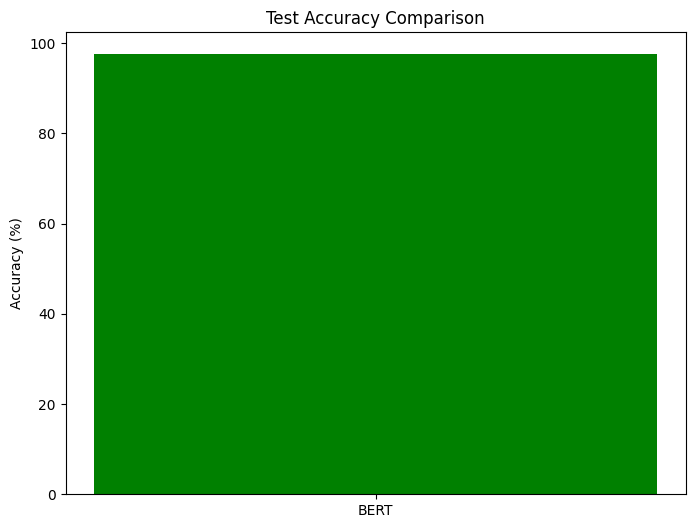

Generating confusion matrix plot...


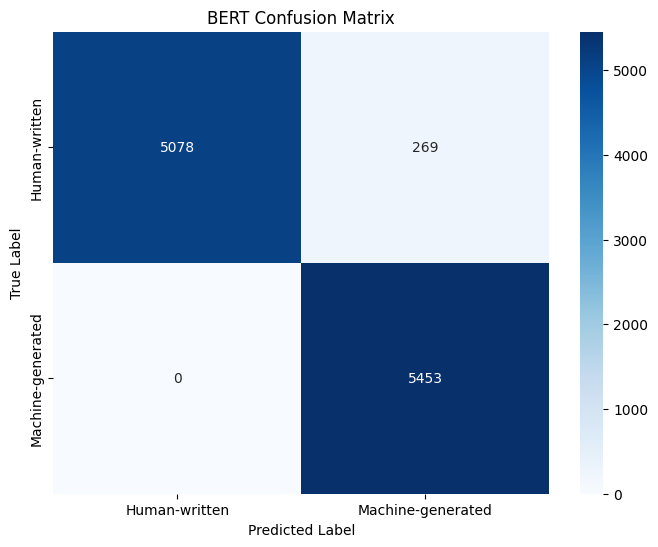

Generating ROC curve...


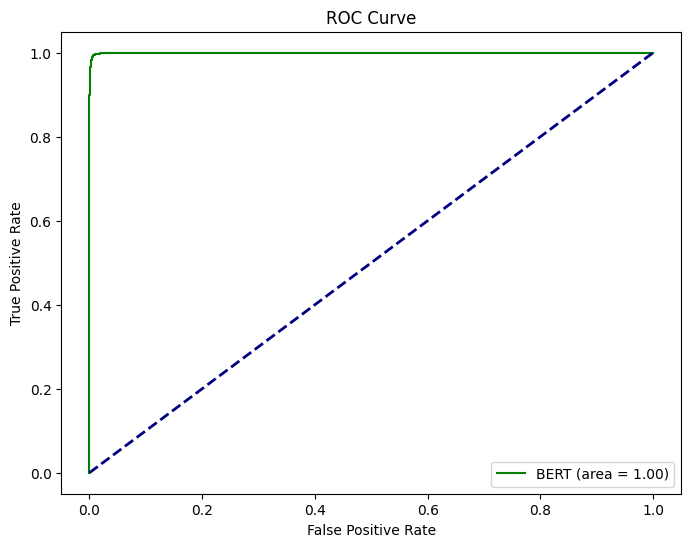

Generating Precision-Recall curve...


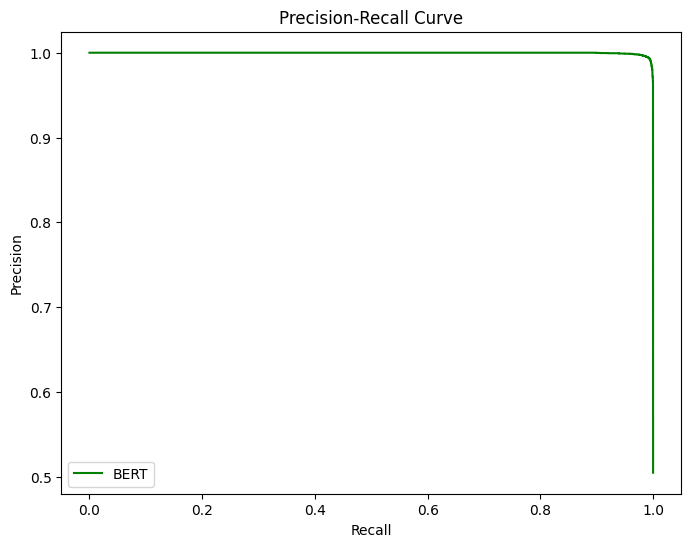

In [ ]:
# Step 17: Visualize Model Performance (Results and Plots)

# Accuracy Bar Plot
print("Generating accuracy bar plot...")
test_accuracy_bert = accuracy_score(labels, predictions)
plt.figure(figsize=(8, 6))
plt.bar(['BERT'], [test_accuracy_bert * 100], color='green')
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.savefig('bert_accuracy_bar_plot.png')
plt.show()

# Confusion Matrix
print("Generating confusion matrix plot...")
conf_matrix_bert = confusion_matrix(labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Human-written', 'Machine-generated'],
            yticklabels=['Human-written', 'Machine-generated'])
plt.title('BERT Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('bert_confusion_matrix.png')
plt.show()

# ROC Curve
print("Generating ROC curve...")
probs_bert = trainer.predict(tokenized_test_dataset).predictions[:, 1]
fpr_bert, tpr_bert, _ = roc_curve(labels, probs_bert)
roc_auc_bert = auc(fpr_bert, tpr_bert)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bert, tpr_bert, label=f'BERT (area = {roc_auc_bert:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('bert_roc_curve.png')
plt.show()

# Precision-Recall Curve
print("Generating Precision-Recall curve...")
precision_bert, recall_bert, _ = precision_recall_curve(labels, probs_bert)
plt.figure(figsize=(8, 6))
plt.plot(recall_bert, precision_bert, label='BERT', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('bert_precision_recall_curve.png')
plt.show()

## **ROC-AUC & Precision-Recall Curves for the three models**

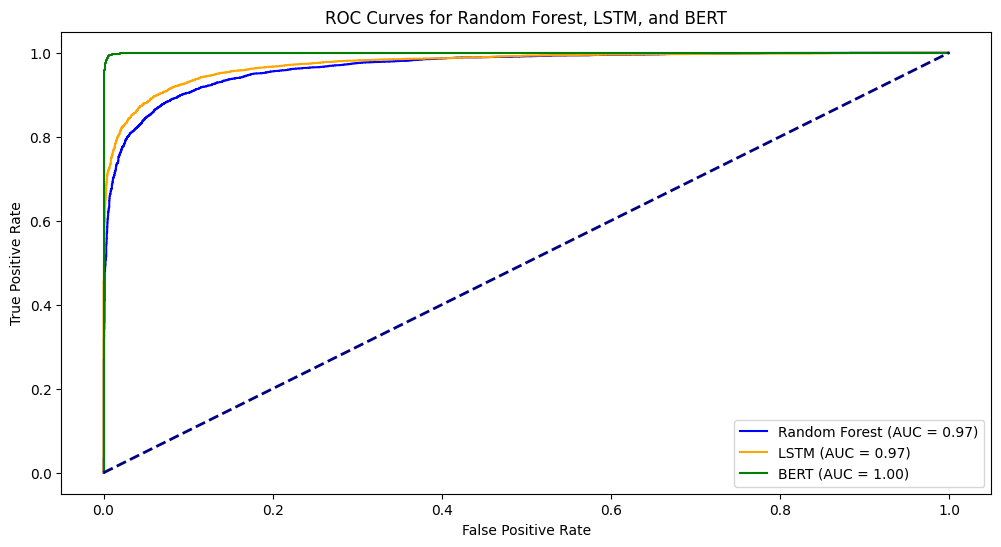

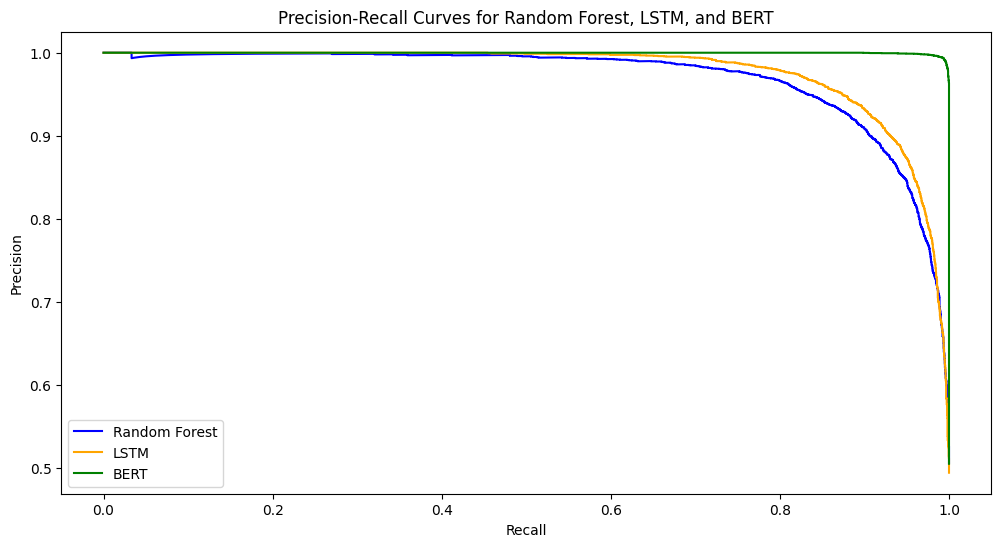

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve Plot
plt.figure(figsize=(12, 6))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier_best.predict_proba(X_test_tfidf)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')

# LSTM ROC
fpr_lstm, tpr_lstm, _ = roc_curve(test_labels, np.array(all_probs))
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})', color='orange')

# BERT ROC
fpr_bert, tpr_bert, _ = roc_curve(labels, probs_bert)
roc_auc_bert = auc(fpr_bert, tpr_bert)
plt.plot(fpr_bert, tpr_bert, label=f'BERT (AUC = {roc_auc_bert:.2f})', color='green')

# Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest, LSTM, and BERT')
plt.legend(loc='lower right')
plt.savefig('combined_roc_curve.png')
plt.show()

# Precision-Recall Curve Plot
plt.figure(figsize=(12, 6))

# Random Forest Precision-Recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_classifier_best.predict_proba(X_test_tfidf)[:, 1])
plt.plot(recall_rf, precision_rf, label='Random Forest', color='blue')

# LSTM Precision-Recall
precision_lstm, recall_lstm, _ = precision_recall_curve(test_labels, np.array(all_probs))
plt.plot(recall_lstm, precision_lstm, label='LSTM', color='orange')

# BERT Precision-Recall
precision_bert, recall_bert, _ = precision_recall_curve(labels, probs_bert)
plt.plot(recall_bert, precision_bert, label='BERT', color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Random Forest, LSTM, and BERT')
plt.legend(loc='lower left')
plt.savefig('combined_precision_recall_curve.png')
plt.show()